# Module 2 Code Challenge

Welcome to your Module 2 Code Challenge. This code challenge is designed to test your understanding of the Module 2 material. It covers:

- Statistical Distributions
- Statistical Tests
- Bayesian Statistics
- Linear Regression

_Read the instructions carefully_. You will be asked both to write code and respond to a few short answer questions.

### Note on the short answer questions: 

For the short answer questions _please use your own words_. The expectation is that you have **not** copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

In [1]:
# Run this cell without changes to import the necessary libraries

# Use any additional libraries you like to complete this assessment 

import itertools
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

---
## Part 1: Statistical Distributions [Suggested time: 25 minutes]
---

### Normal Distributions

Say we have check totals for all checks ever written at a TexMex restaurant. 

The distribution for this population of check totals happens to be normally distributed with a population mean of $\mu = 20$ and population standard deviation of $\sigma = 2$. 

### 1.1) Write a function to compute the z-scores for single check of amount `check_amt`.

In [2]:
# Replace `pass` with appropriate code
def z_score(check_amt):
    """
    check_amt = the amount for which we want to compute the z-score
    
    """
    mu = 20
    sigma = 2
    zscore = (check_amt - mu)/sigma
    return z_score

### 1.2) Use your function to compute the z-score for a 24 dollar check, and interpret the result using the empirical rule. 

In [4]:
# Code here 
check = 24
zscore = z_score(check)
zscore

2.0

In [ ]:
"""
The function found a z-score of 2, which corresponds to a value that is 
2 standard deviations away from the mean. Roughly this can be interpreted
as a bit more than 95% of all checks would be lower than our observed value of 24.

"""


### 1.3) Using $\alpha = 0.05$, is the 24 dollar check significantly _greater_ than the mean? How do you know this?  

For reference, here is a link to a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf). 

In [11]:
# Code here 
p_value = 1-stats.norm.cdf(zscore)
print(p_value)
print(p_value * 2)


0.02275013194817921
0.04550026389635842


In [ ]:
"""
Using the Z-table we can find the Z score of 2 corresponds to a two tailed p value 
of 1 - .97725 = .02275. This is confirmed using the stats.norm.cdf function. This is 
a one tailed test so we would multiply this p value by 2 to get the one tailed level. 
As our one tailed value is lower than alpha, we would say that the check is significantly 
greater than the mean although its relatively close to not being able to say this.

"""

### Confidence Intervals and the Central Limit Theorem

### 1.4) Determine the 95% confidence interval around the mean check total for this population. Interpret your result. 

In [70]:
sigma = 2
mu = 20
upper = 20 + stats.norm.ppf(.975)*sigma
lower = 20 - stats.norm.ppf(.975)*sigma
print('The upper bound for the confidence interval is ' + str(upper))
print('The lower bound for the confidence interval is ' + str(lower))


The upper bound for the confidence interval is 23.919927969080106
The lower bound for the confidence interval is 16.080072030919894


In [ ]:
"""
The 95% confidence interval for mean check for this population has a lower bound of 16.08
and an upper bound of 23.92. This means that we would expect 95% of all checks to fall
within this range

"""

### 1.5) Imagine that we didn't know how the population of check totals was distributed. How would _sampling_ and the _Central Limit Theorem_ allow us to make inferences on the population mean, i.e. estimate $\mu, \sigma$ of the population mean?

In [ ]:
"""
If we did not know the population of check totals we could estimate it using sampling and
the CLT. Assuming normality in the distribution of these sample means allows us to
build an estimate of the population mean using our sampled checks. Our sampled checks
will be normally distributed around the true population mean. This means that we can build
a distribution for the true population mean given enough samples. We can also build out an
estimate for the true standard devation using the formula sigma = sample_sigma/sqrt(n).
This happens as when we take a larger number of data points within a sample then
the mean of that sample will have a lower expected standard devation than an individual
data point from the population. 

"""

---
## Part 2: Statistical Testing [Suggested time: 15 minutes]
---

The TexMex restaurant recently introduced queso to its menu.

We have random samples of 1000 "no queso" order check totals and 1000 "queso" order check totals for orders made by different customers.

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals, respectively. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples. 

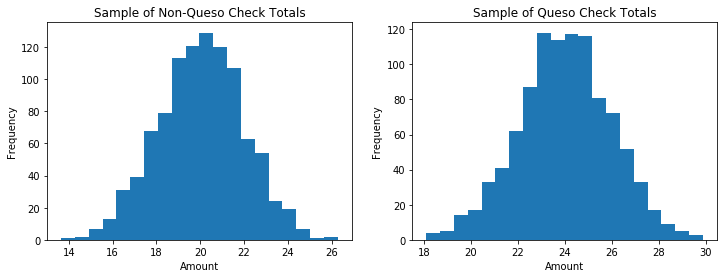

In [12]:
# Run this cell without changes

# Load the sample data 
no_queso = pickle.load(open('data/no_queso.pkl', 'rb'))
queso = pickle.load(open('data/queso.pkl', 'rb'))

# Plot histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

### Hypotheses and Errors

The restaurant owners want to know if customers who order queso spend **more or less** than customers who do not order queso.

### 2.1) Set up the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test.

In [ ]:
"""
H_0: There is no difference between the mean check size of customers who order queso vs
those who don't. Mu_queso = Mu_noqueso

H_A: There is a difference between the mean check size of customers who order queso vs 
those who don't. Mu_queso /= Mu_noqueso

I'll be using a 2 sample t test to answer the question.
"""

### 2.2) What does it mean to make `Type I` and `Type II` errors in this specific context?

In [ ]:
"""
Written answer here
Type 1- False positive
Type 2- False Negative
A Type I error in this case would be that we reject the null that the checks are the same
when they actually are.
A type 2 error in this case means we would not reject the null that the checks are 
the same when in fact they are different.

"""

### Sample Testing

### 2.3) Run a statistical test on the two samples. Can you reject the null hypothesis? 

Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance.

You can use `scipy.stats` to find the answer if you like.  It has already been imported as `stats` and the statistical testing documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests).

In [20]:
# Code here 
print(np.mean(queso))
print(np.mean(no_queso))
print(np.std(queso)/1000)
print(np.std(no_queso)/1000)
stats.ttest_ind(queso,no_queso)

23.992814607054243
20.047532509358607
0.0019760665242680047
0.0019279023051704018


Ttest_indResult(statistic=45.16857748646329, pvalue=1.29670967092511e-307)

In [ ]:
"""
Our t-test returns a t-stat of 45.17 with a pvalue that is essentially 0 (e-307). Thus
we would reject the null hypothesis that the mean check size of queso is the same as the
mean check size of no queso. We can confirm this from looking at the means and
sample errors of the two. Due to our large (1000) sample size the sample error for the means
is quite small so almost any difference in sample means would end up being significant.

"""

---
## Part 3: Bayesian Statistics [Suggested time: 15 minutes]
---
### Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a large, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

### 3.1) What is the probability of Thomas getting a small puppy?
Show your work, not just the final result

In [71]:
# Code here to find the probability
P_petstore = .2
P_pound = 1 - P_petstore
print('The probability of going to the pet store is ' + str(P_petstore))
print('The probability of going to the pound is ' + str(P_pound))

The probability of going to the pet store is 0.2
The probability of going to the pound is 0.8


In [72]:
#these probablities are if he goes to the pet store
P_petstore_small = .6
P_petstore_med = .3
P_petstore_large = .1
print('The probability of getting a small puppy given he goes to the pet store is ' + str(P_petstore_small))
print('The probability of getting a medium puppy given he goes to the pet store is ' + str(P_petstore_med))
print('The probability of getting a large puppy given he goes to the pet store is ' + str(P_petstore_large))


The probability of getting a small puppy given he goes to the pet store is 0.6
The probability of getting a medium puppy given he goes to the pet store is 0.3
The probability of getting a large puppy given he goes to the pet store is 0.1


In [73]:
#these are if he goes to the pound
P_pound_small = .1
P_pound_med = .35
P_pound_large = .55
print('The probability of getting a small puppy given he goes to the pound is ' + str(P_pound_small))
print('The probability of getting a medium puppy given he goes to the pound is ' + str(P_pound_med))
print('The probability of getting a large puppy given he goes to the pound is ' + str(P_pound_large))



The probability of getting a small puppy given he goes to the pound is 0.1
The probability of getting a medium puppy given he goes to the pound is 0.35
The probability of getting a large puppy given he goes to the pound is 0.55


In [74]:
#P(Small) = P(PetStore And PSmall) + P(Pound and PSmall)
P_small = P_petstore * P_petstore_small + P_pound * P_pound_small
print('The probability of Thomas getting a small puppy is '+ str(P_small))

The probability of Thomas getting a small puppy is 0.2


### 3.2) Given that he got a large puppy, what is the probability that Thomas went to the pet store?
Show your work, not just the final result

In [37]:
# Code here to find the probability
#We want the probability Thomas went to the pet store given that he got a large puppy.
# P = desired event(pet store given large)/possible events(Pound and Large + Pet Store and Large)
P_petstore_givenlarge = (P_petstore*P_petstore_large)/((P_petstore*P_petstore_large)+(P_pound*P_pound_large))
print('The probability Thomas went to the pet store given he got a large puppy is '+ str(P_petstore_givenlarge))



The probability Thomas went to the pet store given he got a large puppy is 0.043478260869565216


### 3.3) Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
Show your work, not just the final result

In [40]:
P_petstore_givensmall = P_petstore * P_petstore_small
P_pound_givensmall = P_pound * P_pound_small
print(P_petstore_small)
print(P_pound_small)

print('It is more likely that he went to the pet store given he got a small puppy.')


0.12
0.08000000000000002
It is more likely that he went to the pet store given he got a small puppy.


### 3.4) For Question 3.2, what are the prior, posterior, and likelihood?

In [ ]:
"""
Written answer here for the prior

The prior in this case is that he got a large puppy since we know this occured in the
subset we are looking for.

Written answer here for the posterior

The posterior here is the probability that he went to the pet store given he got a large 
puppy. Its what we are trying to find.

Written answer here for the likelihood

The likelihood in this case is when he goes to the pet store and he 
gets a large puppy.

"""

---
## Part 4: Linear Regression [Suggested Time: 10 min]
---

In this section, you'll be using the Advertising data, and you'll be creating linear models that are more complicated than a simple linear regression. The relevant modules have already been imported at the beginning of this notebook. We'll load and prepare the dataset for you below.

In [75]:
# Run this cell without changes

data = pd.read_csv('data/advertising.csv').drop('Unnamed: 0', axis=1)

data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [52]:
# Run this cell without changes

X = data.drop('sales', axis=1)
y = data['sales']


In the linear regression section of the curriculum, you analyzed how TV, Radio, and Newspaper spendings individually affected the Sales figures. Here, we'll use all three together in a multiple linear regression model!

### 4.1) Create a Correlation Matrix for `X`.

In [76]:
X.corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


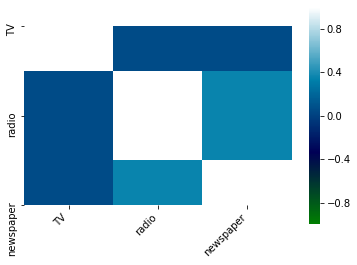

In [83]:
corr = X.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='ocean',
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### 4.2) Based on this correlation matrix only, would you recommend to use `TV`, `radio`, and `newspaper` in the same multiple linear regression model?

In [ ]:
"""
Based solely on this correlation matrix I would recommend that we use all three of these
features in the same model. The highest correlation between any of these features is .35
between newspaper and radio which is still relatively low. A cutoff of correlation above .7
is generally used to indicate too high multicollinearity. The other sets of correlations
are very close to 0.

"""

### 4.3) Use StatsModels' `ols`-function to create a multiple linear regression model with `TV`, `radio`, and `newspaper` as independent variables and `sales` as the dependent variable. 

**Required output:** the model summary of this multiple regression model.

In [49]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [66]:
mlr_ols = ols('sales~TV + radio + newspaper',data = data)
results_ols = mlr_ols.fit()
results_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           1.58e-96
Time:                        10:30:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.4) Do we have any statistically significant coefficients? If the answer is yes, list them below.

In [ ]:
"""
Based on the summary from our model both TV and radio have statistically significant
coefficiants. From the summary we cannot say that the coefficient for newspaper is 
significantly different from 0.

Overall this model seems quite explanatory with an R^2 of .897!
"""